# 키워드 분석(Keyword Analysis)

* 핵심어(keyword)란 텍스트 자료의 중요한 내용을 압축적으로 제시하는 단어 또는 문구
* 핵심어 분석이란 불용어 제거와 어간 추출 및 형태소 분석 등의 자연어 처리를 시행한 후 텍스트에서 많이 등장하는 형태소의 등장 빈도를 분석함으로써 핵심어를 추출
* 특정 텍스트 자료에 많이 나타나는 형태소가 그 텍스트 주제를 표출할 가능성이 높다는 가정에 기초
* 조사와 같이 의미를 별로 담고있지 않은 불용어는 제외
* 키워드 분석은 텍스트의 주제 추정, 텍스트 유사도, 검색 결과 우선 순위 측정 등 다양하게 사용될 수 있음
* 너무 빈도가 높아서 오히려 방해가 되는 것도 있음. 이것도 제외해야 함

## 한글 폰트 설정
* 실행 후 런타임 재시작 필요

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정파일 위치: ', mpl.matplotlib_fname())
# 파일 위치에 나눔글꼴 설치 후 아래코드 실행해야 경로 찾음
fm._rebuild()
#matplotlibrc 파일 수정함

버전:  3.1.3
설치 위치:  C:\Users\bini\anaconda3\envs\anaconda\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\bini\.matplotlib
캐시 위치:  C:\Users\bini\.matplotlib
설정파일 위치:  C:\Users\bini\anaconda3\envs\anaconda\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [ ]:
for f in fm.fontManager.ttflist:
    if 'NanumGothic' == f.name:
        print(f'Font: {f.name}, Path: {f.fname}')

In [ ]:
#테스트코드1

## 폰트 경로
font_path = 'C:/Users/bini/anaconda3/envs/anaconda/lib/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'
 
## FontProperties 인스턴스 생성
font_prop = fm.FontProperties(fname=font_path)
 
## 폰트 이름
font_name = font_prop.get_name()
 
## 폰트 일괄 설정
mat.rc('font',family=font_name)
 
## 예제용 데이터
frequency = [10,11,5,8,11] ## 빈도수
label = ['가','나','다','라','마'] ## 그룹
 
## 시각화 하기
fig = plt.figure(figsize=(10,10))
 
xpos = list(range(len(frequency))) ## 네모 바가 그려질 x 좌표
 
plt.bar(xpos, height=frequency) ## 바차트 그리기
plt.xticks(xpos, label) ## 바차트 눈금 설정
plt.title('그룹별 빈도수')
plt.show()

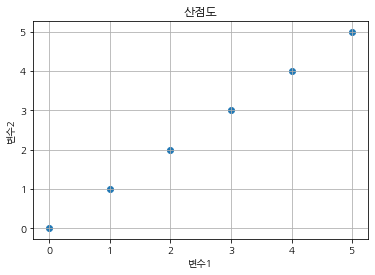

In [3]:
#테스트코드 2

plt.scatter([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])
plt.title('산점도')
plt.xlabel('변수1')
plt.ylabel('변수2')
plt.grid(True)
plt.show()

## 한국어 자연어 처리 konlpy와 형태소 분석기 MeCab 설치

## 네이버 영화 리뷰 데이터
* 키워드 분석에는 네이버 영화 리뷰 데이터를 사용
* 데이터 다운로드: https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [4]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

* 데이터를 확인해보면 모두 바이트로 이루어져 있으며, 리뷰 외의 다른 데이터도 존재
* 데이터를 문자열로 변환하고 리뷰만 추출

In [5]:
raw = [x.decode() for x in raw[1:]]

reviews = []
for i in raw : 
    reviews.append(i.split('\t')[1])
    
print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


## 형태소 분석을 이용한 명사 추출
* 형태소 분석기 Mecab으로 명사만 추출

In [6]:
from konlpy.tag import Mecab
tagger = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")

nouns = []
for review in reviews : 
    for noun in tagger.nouns(review):
        nouns.append(noun)

print(nouns[:10])

['때', '디자인', '학생', '외국', '디자이너', '그', '전통', '발전', '문화', '산업']


## 불용어(Stopwords) 사전 만들기
* 형태소 분석을 통해 조사, 접속사 등을 제거 가능
* 하지만 한국어에는 명사에도 상당히 많은 불용어가 포함
* 사용자가 직접 불용어 사전을 유지하면서 불필요한 단어 제거 필요
* 불용어 예: `전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것`
* 빈도가 너무 커서 분석에 방해되는 단어도 제거 필요 (예: `영화`)

In [29]:
stop_words = "영화 전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것 평점 연기 스토리 드라마"
stop_words = stop_words.split(' ')
print(stop_words)

['영화', '전', '난', '일', '걸', '뭐', '줄', '만', '건', '분', '개', '끝', '잼', '이거', '번', '중', '듯', '때', '게', '내', '말', '나', '수', '거', '점', '것', '평점', '연기', '스토리', '드라마']


## 불용어를 제외하여 형태소 분석 수행
* 한글 텍스트에 대해서 형태소 분석 수행
* 분석으로 추출하는 명사 중에서 불용어에 포함되지 않은 텍스트만 추출하여 저장

In [30]:
nouns = []
for review in reviews :
    for noun in tagger.nouns(review) :
        if noun not in stop_words :
            nouns.append(noun)
            
nouns[:10]

['디자인', '학생', '외국', '디자이너', '그', '전통', '발전', '문화', '산업', '우리']

## 단어 빈도수 측정
* 단어 빈도수 측정에는 `collections` 라이브러리의 `Counter`함수를 이용
* `collections` 라이브러리는 내장 라이브러리로 별도 설치가 필요없음
* `counter`를 이용하면 각 단어와 각 단어의 빈도 수를 딕셔너리로 편리하게 생성 가능

In [31]:
from collections import Counter

nouns_counter = Counter(nouns)
nouns_counter

Counter({'디자인': 54,
         '학생': 187,
         '외국': 192,
         '디자이너': 19,
         '그': 1410,
         '전통': 37,
         '발전': 197,
         '문화': 311,
         '산업': 31,
         '우리': 2531,
         '나라': 1409,
         '시절': 874,
         '열정': 205,
         '노라노': 1,
         '저': 1218,
         '사람': 6742,
         '꿈': 597,
         '감사': 606,
         '폴리스': 31,
         '시리즈': 1380,
         '뉴': 45,
         '께': 20,
         '하나': 3923,
         '최고': 8813,
         '생각': 6943,
         '몰입': 1453,
         '안개': 24,
         '밤하늘': 6,
         '초승달': 2,
         '사랑': 4741,
         '처음': 2673,
         '감동': 6489,
         '전쟁': 926,
         '빠': 294,
         '굿': 2110,
         '바보': 350,
         '병': 289,
         '쉰': 12,
         '인': 222,
         '나이': 549,
         '훗날': 21,
         '보면대': 1,
         '사': 240,
         '감정': 885,
         '완벽': 748,
         '이해': 2745,
         '고질라': 53,
         '니무': 1,
         '오페라': 61,
         '작품': 3985,
      

In [32]:
top_nouns = dict(nouns_counter.most_common(50))
top_nouns

{'최고': 8813,
 '생각': 6943,
 '사람': 6742,
 '감동': 6489,
 '배우': 5893,
 '내용': 5731,
 '감독': 5629,
 '재미': 5479,
 '시간': 5320,
 '년': 4936,
 '사랑': 4741,
 '쓰레기': 4585,
 '작품': 3985,
 '하나': 3923,
 '정도': 3656,
 '이건': 3650,
 '마지막': 3647,
 '액션': 3568,
 '기대': 3465,
 '장면': 3262,
 '이게': 3046,
 '편': 3044,
 '최악': 3019,
 '돈': 2980,
 '이야기': 2947,
 '이해': 2745,
 '애': 2730,
 '명작': 2685,
 '여자': 2678,
 '이상': 2676,
 '처음': 2673,
 '한국': 2640,
 '주인공': 2553,
 '우리': 2531,
 '연출': 2376,
 '때문': 2371,
 '기억': 2364,
 '현실': 2193,
 '마음': 2128,
 '굿': 2110,
 '남자': 2078,
 '결말': 2066,
 '인생': 2060,
 '공포': 2048,
 '전개': 2035,
 '짜증': 2011,
 '소재': 1999,
 '느낌': 1950,
 '필요': 1929,
 '씨': 1902}

## 단어 빈도 시각화
* 가장 간단하게는 히스토그램

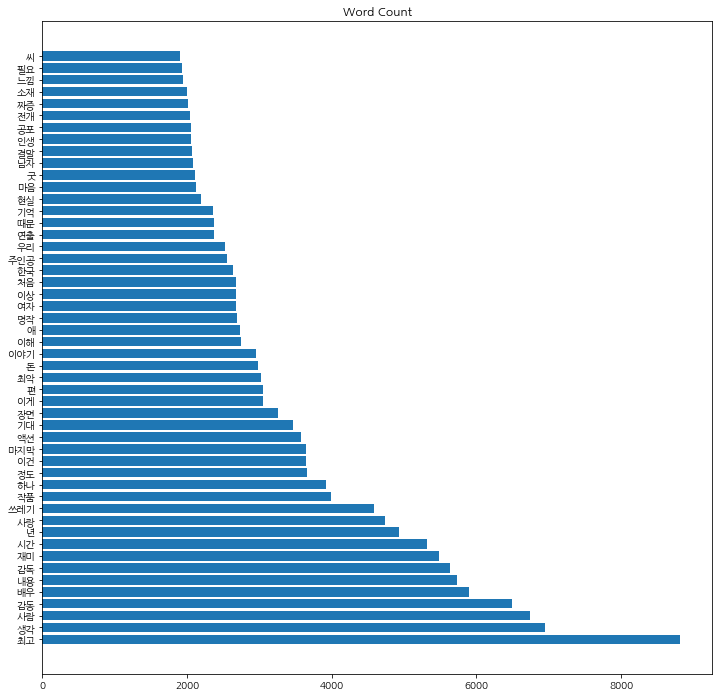

In [33]:
import numpy as np

y_pos = np.arange(len(top_nouns))

plt.figure(figsize=(12,12))
plt.barh(y_pos, top_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos, top_nouns.keys())
plt.show()

## 워드클라우드(WordColud)

* 텍스트에 담겨있는 여러 형태소의 등장 빈도를 직관적으로 시각화
* 빈도 수만을 시각적으로 표현한 것이기 때문에, 단어들 사이의 연관성이나 의미 구조 등을 분석하는 데는 한계가 있음

* 파이썬에서 워드 클라우드를 시각화하기 위해 `matplotlib` 라이브러리와 `WordCloud` 라이브러리를 `import` 해서 사용
* `WordCloud` 라이브러리는 `pip install wordcloud` 명령어를 통해 설치 필요

In [34]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white', font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_nouns) #워드클라우드 객체 생성

* 시각화할때는 이미지 시각화 함수인 `imshow()`함수를 사용해야 함

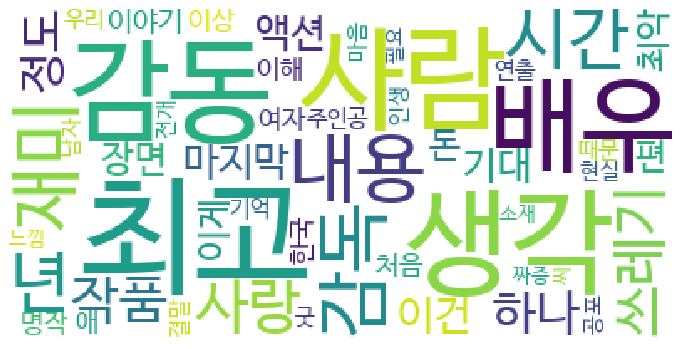

In [36]:
figure = plt.figure(figsize=(12,12))
ax = figure.add_subplot(1,1,1)
ax.axis('off')
ax.imshow(wc)
plt.show()

## squarify 트리맵 시각화
* `squarify`는 트리맵 생성을 지원해주는 파이썬 라이브러리
* `squarify` 라이브러리를 이용해 키워드와 키워드 빈도 수를 트리맵으로 나타냄   

* 영역, 크기, 색깔에 따라서 키워드가 얼마나 중요한지에 따라 출력이 됨

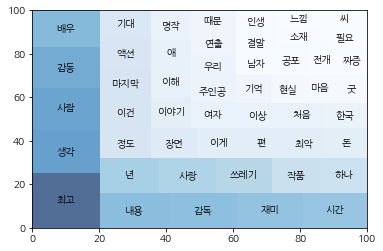

In [41]:
import squarify

norm = mpl.colors.Normalize(vmin=min(top_nouns.values()),
                           vmax=max(top_nouns.values()))

colors = [mpl.cm.Blues(norm(value)) for value in top_nouns.values()]

squarify.plot(label=top_nouns.keys(),
            sizes=top_nouns.values(),
            color=colors,
            alpha=.7)